In [6]:
#!/usr/local/Cellar/python/2.7.6/bin/python
# -*- coding: utf-8 -*-


from numpy import *
import scipy.misc, scipy.io, scipy.optimize, scipy.cluster.vq

=from matplotlib import pyplot, cm, colors


import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [ ]:
N=100

data1=[[0.5+0.5*random.random(),0.5+0.5*random.random()] for i in range(N)]
data2=[[0.5*random.random(),0.5*random.random()] for i in range(N)]
	
data1=np.array(data1)
data2=np.array(data2)	

data = np.concatenate((data1,data2))

X=c_[data[:,0],data[:,1]]




def displaydata():
	pyplot.scatter(X[:,0],X[:,1])
	pyplot.show()
	



def findClosestCentroids( X, centroids ):
	K 	= shape( centroids )[0]
	m   = shape( X )[0]
	idx = zeros( (m, 1) )

	for i in range(0, m):
		lowest 		 = 999
		lowest_index = 0

		for k in range( 0, K ):
			cost = X[i] - centroids[k]
			cost = cost.T.dot( cost )
			if cost < lowest:
				lowest_index = k
				lowest 		 = cost

		idx[i] = lowest_index
	return idx + 1 # add 1, since python's index starts at 0
	
def computeCentroidsLoop(X, idx, K):
	m, n = shape( X )	
	centroids = zeros((K, n))

	for k in range(1, K+1):

		counter = 0
		cum_sum = 0
		for i in range( 0, m ):
			if idx[i] == k:
				cum_sum += X[i]
				counter += 1
		centroids[k-1] = cum_sum / counter
	return centroids
		
def computeCentroids( X, idx, K ):
	m, n = shape( X )	
	centroids = zeros((K, n))

	data = c_[X, idx] # append the cluster index to the X

	for k in range( 1, K+1 ):
		temp 			= data[data[:, n] == k] # quickly extract X that falls into the cluster
		count 			= shape( temp )[0]		# count number of entries for that cluster

		for j in range( 0, n ):
			centroids[k-1, j] = sum(temp[:, j]) / count

	return centroids

def runkMeans( X, initial_centroids, max_iters, plot=False ):
	K 			= shape( initial_centroids )[0]
	centroids 	= copy( initial_centroids )
	idx 		= None

	for iteration in range( 0, max_iters ):
		idx 		= findClosestCentroids( X, centroids )
		centroids 	= computeCentroids( X, idx, K )
	
		if plot is True:	
			data = c_[X, idx]

			# Extract data that falls in to cluster 1, 2, and 3 respectively, and plot them out
			data_1 = data[data[:, 2] == 1]
			pyplot.plot( data_1[:, 0], data_1[:, 1], 'ro', markersize=5 )

			data_2 = data[data[:, 2] == 2]
			pyplot.plot( data_2[:, 0], data_2[:, 1], 'go', markersize=5 )

			data_3 = data[data[:, 2] == 3]
			pyplot.plot( data_3[:, 0], data_3[:, 1], 'bo', markersize=5 )
			
			data_4 = data[data[:, 2] == 4]
			pyplot.plot( data_4[:, 0], data_4[:, 1], 'yo', markersize=5 )
			
			pyplot.plot( centroids[:, 0], centroids[:, 1], 'k*', markersize=14 )
			
			pyplot.xlim([-0.1,1.1])
			pyplot.ylim([-0.1,1.1])

			pyplot.show( block=True )

	return centroids, idx

def kMeansInitCentroids( X, K ):
	return np.random.permutation( X )[:K]

def part1_1(X, centroids):
	
	K 	= 4

	initial_centroids = centroids

	idx = findClosestCentroids( X, initial_centroids )
	print idx[0:K] 
	
	
	centroids = computeCentroids( X, idx, K )
	print centroids


def part1_2(X,centroids):
	K 	= 4

	max_iters = 10
	
	runkMeans( X, centroids, max_iters, plot=True )



def part1_3(X,centroids):
	K 	= 4

	max_iters = 10
	print kMeansInitCentroids( X, K ) # it's randomly one of the coordinates from X



Here are the data points. I chose random 50 data from the two boxes with 0.5 lengthy edges. We know the proper K-number for K-means clustering is 2. However, when we set K>2, the K-means clustering gives a ugly result. Besides, the clustering strongly depends on the initial choice of the 4 assignment points.  

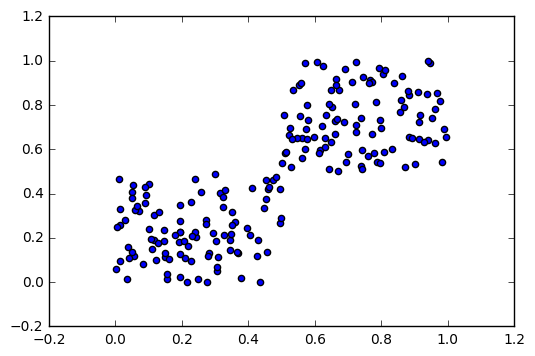

In [10]:
set_printoptions(precision=6, linewidth=200)
displaydata()


Choose the K-means for K = 4. The proper K should be 2 for the data points. However, what happens if K = 4? From the below plots, the program is not working well. 

In [9]:
centroids = array([[random.random(), random.random()], [random.random(), random.random()], [random.random(), random.random()],[random.random(), random.random()]])
part1_1(X,centroids)

[[ 4.]
 [ 4.]
 [ 2.]
 [ 4.]]
[[ 0.199317  0.208257]
 [ 0.79478   0.780224]
 [ 0.53369   0.865798]
 [ 0.54678   0.551297]]


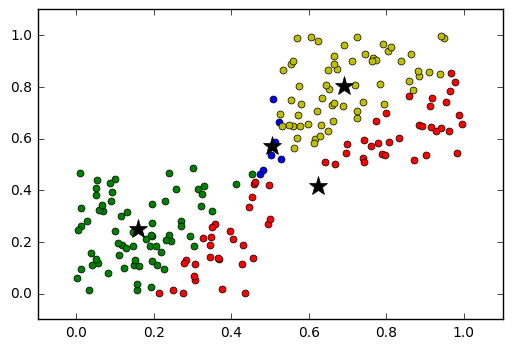

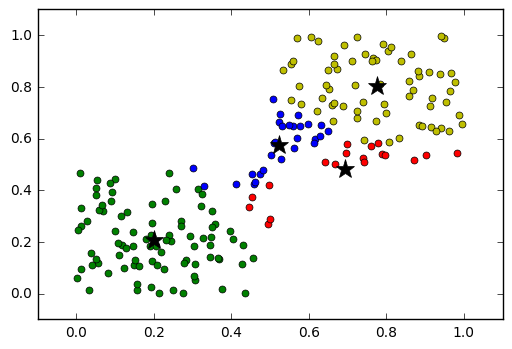

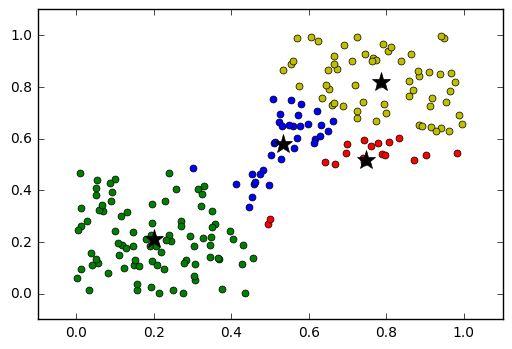

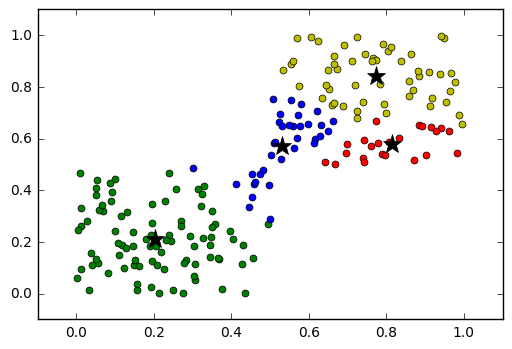

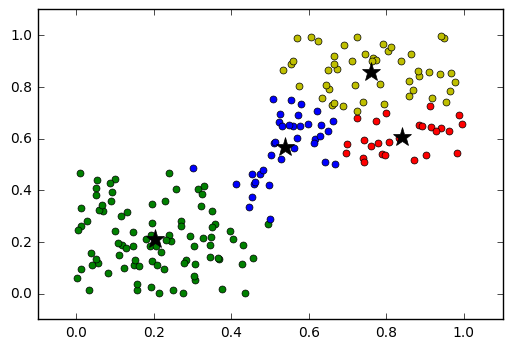

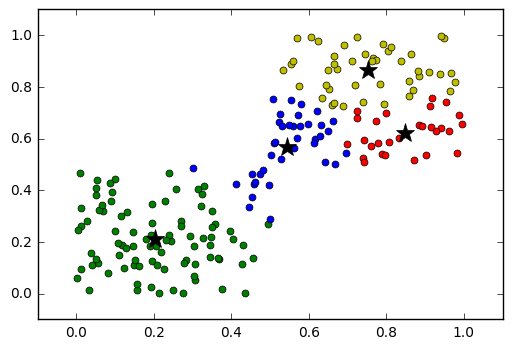

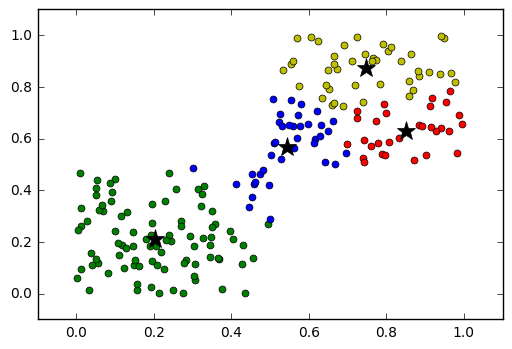

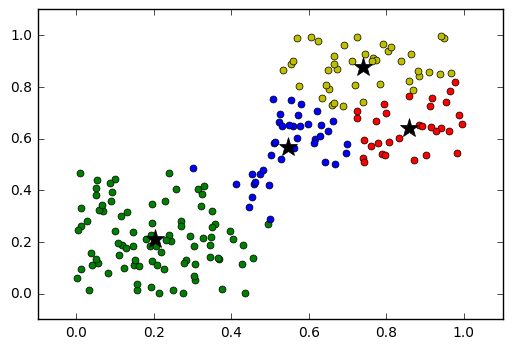

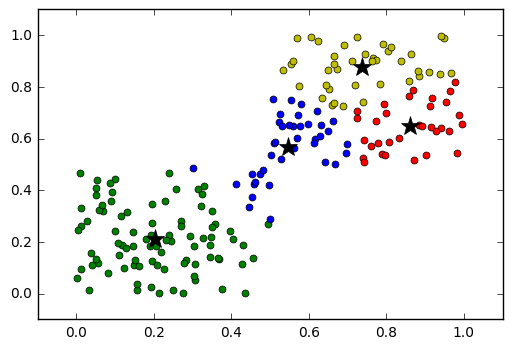

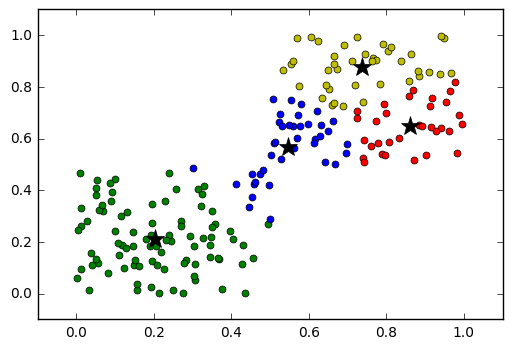

In [8]:
part1_2(X,centroids)